In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import cv2
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
train_dir = ("/content/gdrive/MyDrive/BrainStroke/Brain_Stroke_CT-SCAN_image/Train")

test_dir = ("/content/gdrive/MyDrive/BrainStroke/Brain_Stroke_CT-SCAN_image/Test")

validation_dir = ("/content/gdrive/MyDrive/BrainStroke/Brain_Stroke_CT-SCAN_image/Validation")

In [4]:
img_width, img_height = 256, 256

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.0)

test_datagen = ImageDataGenerator(rescale=1/255.0)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 1843 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 235 images belonging to 2 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 437 images belonging to 2 classes.


In [8]:
# Create the Sequential model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 256)       0

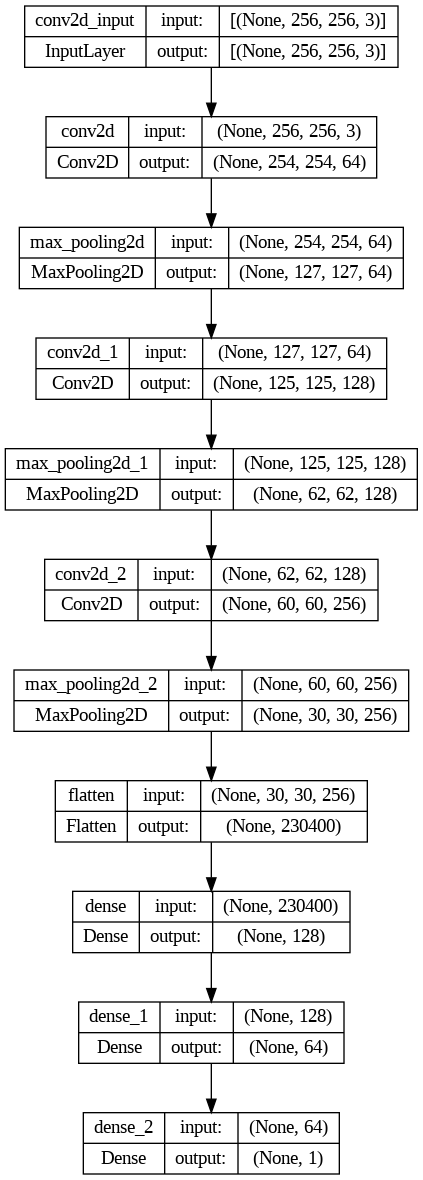

In [61]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.2 MB/s eta 0:00:00


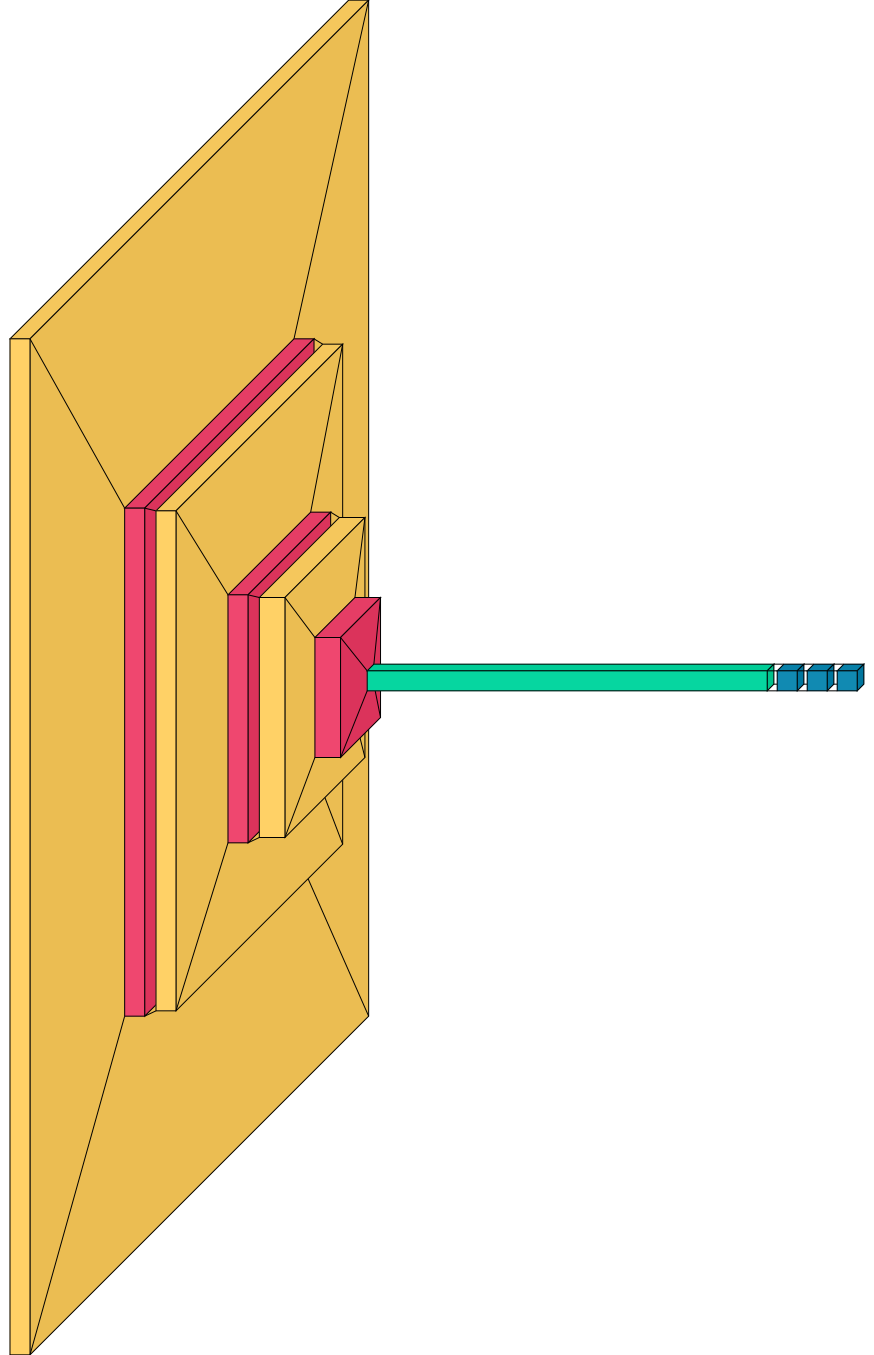

In [60]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

In [9]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
    )

In [10]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
58/58 [==============================] - 826s 14s/step - loss: 0.6542 - accuracy: 0.6359 - val_loss: 0.4927 - val_accuracy: 0.7702
Epoch 2/10
58/58 [==============================] - 793s 14s/step - loss: 0.3397 - accuracy: 0.8459 - val_loss: 0.2533 - val_accuracy: 0.8936
Epoch 3/10
58/58 [==============================] - 798s 14s/step - loss: 0.1085 - accuracy: 0.9577 - val_loss: 0.0858 - val_accuracy: 0.9617
Epoch 4/10
58/58 [==============================] - 803s 14s/step - loss: 0.0352 - accuracy: 0.9902 - val_loss: 0.0679 - val_accuracy: 0.9745
Epoch 5/10
58/58 [==============================] - 790s 14s/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0727 - val_accuracy: 0.9872
Epoch 6/10
58/58 [==============================] - 789s 14s/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0493 - val_accuracy: 0.9872
Epoch 7/10
58/58 [==============================] - 794s 14s/step - loss: 0.0135 - accuracy: 0.9946 - val_loss: 0.1574 - val_accuracy: 0.9489
Epoch 

In [62]:
import pickle

# Save the Model
MODEL_NAME = '/content/gdrive/MyDrive/BrainStroke/Brain_Stroke_CT-SCAN_image/model/model.h5'
model.save(MODEL_NAME)

# Save the history object to a specific directory
history_filename = '/content/gdrive/MyDrive/BrainStroke/Brain_Stroke_CT-SCAN_image/model/history.pickle'
with open(history_filename, 'wb') as file:
    pickle.dump(history.history, file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

14/14 [==============================] - 69s 5s/step - loss: 0.2162 - accuracy: 0.9611
Test Loss: 0.21616652607917786
Test Accuracy: 0.9610983729362488


Found 437 images belonging to 2 classes.
14/14 [==============================] - 57s 4s/step


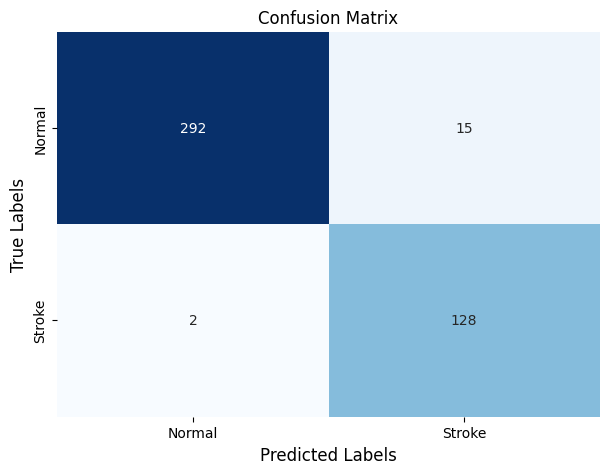

Precision: 0.8951048951048951
Recall: 0.9846153846153847
F1 Score: 0.9377289377289378


In [16]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)



# Plot confusion matrix
label_names = ['Normal', 'Stroke']  # Replace with your class labels
beingsaved = plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(len(label_names)) + 0.5, label_names)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names)
plt.xlabel('Predicted Labels',fontsize=12)
plt.ylabel('True Labels',fontsize=12)
plt.title('Confusion Matrix')
beingsaved.savefig('Stroke_Confusion_Matrix.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


1/1 [==============================] - 0s 332ms/step


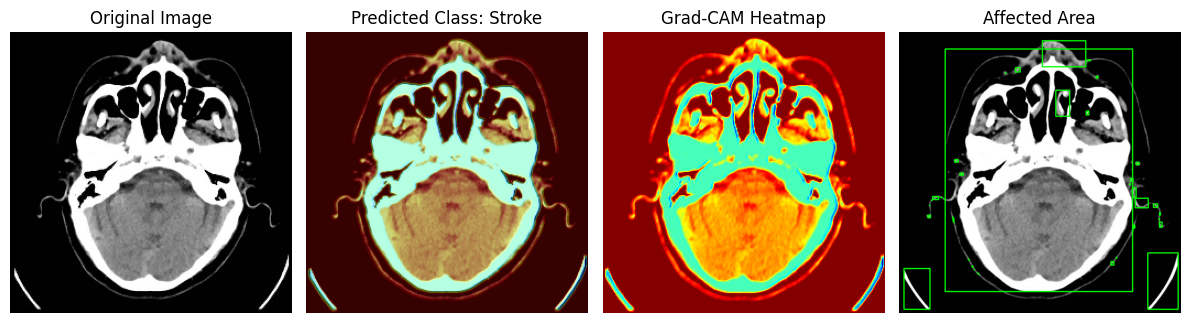

In [56]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Affected_Area(img_path):
    image = cv2.imread(img_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply image processing operations (e.g., thresholding, morphological operations) for stroke detection
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

    # Find contours in the closed image
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the bounding boxes
    bounding_boxes = []

    # Draw bounding boxes around the contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, x + w, y + h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image

target_class_index = 1
img_path = '/content/gdrive/MyDrive/BrainStroke/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (img_width, img_height))
img = np.expand_dims(img, axis=0) / 255.0

grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer('conv2d').output, model.output]  # Modify 'conv2d_1' to match the actual layer name
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    loss = predictions[:, 0]  # Select the first (and only) element along the second dimension

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

heatmap = cv2.resize(heatmap, (img.shape[2], img.shape[1]))
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(
    np.uint8(255 * img[0]),
    0.6,
    np.uint8(heatmap),
    0.4,
    0
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(img[0])
plt.title('Original Image')
plt.axis('off')

predicted_class = model.predict(img)
predicted_class_index = int(predicted_class[0] >= 0.5)  # Get the index of the predicted class
class_names = ['No Stroke', 'Stroke']  # Define the class names

if predicted_class_index == 1:
    plt.subplot(1, 4, 2)
    plt.imshow(superimposed_img)
    plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(heatmap)
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    Stroke_Affected = Affected_Area(img_path)

    plt.subplot(1, 4, 4)
    plt.imshow(Stroke_Affected)
    plt.title('Affected Area')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    plt.subplot(1, 4, 2)
    plt.imshow(img[0])
    plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
    plt.axis('off')

<ipython-input-57-cad901c749a8>:51: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)


1/1 [==============================] - 0s 193ms/step


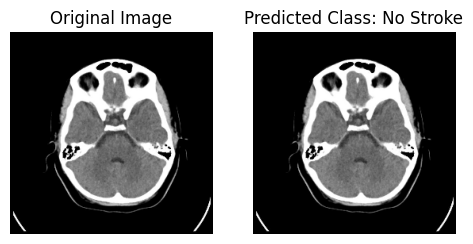

In [57]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Affected_Area(img_path):
    image = cv2.imread(img_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply image processing operations (e.g., thresholding, morphological operations) for stroke detection
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

    # Find contours in the closed image
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the bounding boxes
    bounding_boxes = []

    # Draw bounding boxes around the contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, x + w, y + h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image

target_class_index = 1
img_path = '/content/gdrive/MyDrive/BrainStroke/Brain_Stroke_CT-SCAN_image/Test/Normal/106 (10).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (img_width, img_height))
img = np.expand_dims(img, axis=0) / 255.0

grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer('conv2d').output, model.output]  # Modify 'conv2d_1' to match the actual layer name
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    loss = predictions[:, 0]  # Select the first (and only) element along the second dimension

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

heatmap = cv2.resize(heatmap, (img.shape[2], img.shape[1]))
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(
    np.uint8(255 * img[0]),
    0.6,
    np.uint8(heatmap),
    0.4,
    0
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(img[0])
plt.title('Original Image')
plt.axis('off')

predicted_class = model.predict(img)
predicted_class_index = int(predicted_class[0] >= 0.5)  # Get the index of the predicted class
class_names = ['No Stroke', 'Stroke']  # Define the class names

if predicted_class_index == 1:
    plt.subplot(1, 4, 2)
    plt.imshow(superimposed_img)
    plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(heatmap)
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    Stroke_Affected = Affected_Area(img_path)

    plt.subplot(1, 4, 4)
    plt.imshow(Stroke_Affected)
    plt.title('Affected Area')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    plt.subplot(1, 4, 2)
    plt.imshow(img[0])
    plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
    plt.axis('off')